# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

# Transformations

A **transformation** refers to a mathematical function that maps one vector space to another, preserving the linear structure inherent in each vector space. When discussing a particular transformation, it is common to denote it with a symbol, such as $T$. For clarity, you can specify the vector spaces involved in the mapping, for instance, $T: \mathbb{R}^2 \rightarrow \mathbb{R}^3$. This notation indicates that the transformation $T$ takes a vector $v \in \mathbb{R}^2$ and produces an output vector $w \in \mathbb{R}^3$. The transformation can be expressed as $T(v) = w$, which can be interpreted as “the transformation $T$ applied to vector $v$ results in vector $w$” or alternatively, “vector $w$ is the **image** of vector $v$ under transformation $T$.”

The transformation defined here is represented by a Python function corresponding to the transformation $T: \mathbb{R}^2 \rightarrow \mathbb{R}^3$, with the following symbolic representation:

$$T\begin{pmatrix}
          \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}\end{pmatrix}=
          \begin{bmatrix}
           2v_1 \\
           v_1 + v_2 \\
           v_2
          \end{bmatrix}
          \tag{1}
          $$

In this formula, the input vector is transformed simply: the first component is scaled by a factor of 2, the second component is the sum of the first and second components, and the third component is equal to the second component. This transformation illustrates how vectors in $\mathbb{R}^2$ can be manipulated to produce vectors in a higher-dimensional space $\mathbb{R}^3$.


# Linear Transformations

A transformation $T$ is said to be **linear** if it satisfies two fundamental properties for any scalar $k$ and any input vectors $u$ and $v$:

1. $T(kv) = kT(v)$,
2. $T(u + v) = T(u) + T(v)$.

In the previous example, $T$ is a linear transformation:

$$T(kv) =
          T \begin{pmatrix}\begin{bmatrix}
          kv_1 \\
          kv_2
          \end{bmatrix}\end{pmatrix} = 
          \begin{bmatrix}
           2(kv_1) \\
           (kv_1) + (kv_2) \\
           (kv_2)
          \end{bmatrix} =
          k\begin{bmatrix}
           2v_1 \\
           v_1 + v_2 \\
           v_2
          \end{bmatrix} = 
          kT(v)\tag{2}$$
          
$$T(u + v) =
          T \begin{pmatrix}\begin{bmatrix}
          u_1 + v_1 \\
          u_2 + v_2
          \end{bmatrix}\end{pmatrix} = 
          \begin{bmatrix}
           2(u_1 + v_1) \\
           (u_1 + v_1) + (u_2 + v_2) \\
           (u_2 + v_2)
          \end{bmatrix} = 
          \begin{bmatrix}
           2u_1 \\
           u_1 + u_2 \\
           u_2
          \end{bmatrix} +
          \begin{bmatrix}
           2v_1 \\
           v_1 + v_2 \\
           v_2
          \end{bmatrix} = 
          T(u) + T(v)\tag{3}$$


# Transformations Defined as a Matrix Multiplication

In linear algebra, transformations can be effectively expressed using matrices. Consider a transformation $ T $ that maps vectors from $ \mathbb{R}^2 $ to $ \mathbb{R}^3 $. This transformation can be represented as:

$$
T(v) = A v\tag{4}
$$

where $ A $ is a matrix of dimensions $ 3 \times 2 $, and $ v $ is a column vector of dimensions $ 2 \times 1 $. The result of this multiplication is another vector $ w $ with dimensions $ 3 \times 1 $.

Let's explore a specific transformation:

$$
T\left(\begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}\right) =
          \begin{bmatrix}
           2v_1 \\
           v_1 + v_2 \\
           v_2
          \end{bmatrix}\tag{5}
$$

We want to identify the elements of the matrix $ A $ such that the transformation holds true. To express this, we can write:

$$
T(v) = A \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix} = 
          \begin{bmatrix}
           a_{1,1} & a_{1,2} \\
           a_{2,1} & a_{2,2} \\
           a_{3,1} & a_{3,2}
          \end{bmatrix}
          \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix} =
          \begin{bmatrix}
           a_{1,1}v_1 + a_{1,2}v_2 \\
           a_{2,1}v_1 + a_{2,2}v_2 \\
           a_{3,1}v_1 + a_{3,2}v_2
          \end{bmatrix} =
          \begin{bmatrix}
           2v_1 \\
           v_1 + v_2 \\
           v_2
          \end{bmatrix}\tag{6}
$$

By equating the components, we can determine the values of the elements $ a_{i,j} $ of the matrix $ A $ that make this equality hold true.

# Standard Transformations

A **linear transformation** $ T: \mathbb{R}^2 \rightarrow \mathbb{R}^2 $ can be represented through the multiplication of a $ 2 \times 2 $ matrix and a vector $ v \in \mathbb{R}^2 $. To gain a clearer understanding of how these transformations operate within the $ \mathbb{R}^2 $ space, it's beneficial to select our vectors systematically rather than arbitrarily.

A practical choice is to utilize the standard basis vectors, $ e_1 = \begin{bmatrix} 5 \\ 0 \end{bmatrix} $ and $ e_2 = \begin{bmatrix} 0 \\ 5 \end{bmatrix} $. We can apply the linear transformation $ T $ to each of these basis vectors, resulting in $ T(e_1) = A e_1 $ and $ T(e_2) = A e_2 $.

When we assemble the basis vectors $ \{ e_1, e_2 \} $ into the columns of a matrix and perform the multiplication, we arrive at the following equation:

$$
A \begin{bmatrix} e_1 & e_2 \end{bmatrix} = \begin{bmatrix} A e_1 & A e_2 \end{bmatrix} = \begin{bmatrix} T(e_1) & T(e_2) \end{bmatrix} \tag{7}
$$

By utilizing the basis vectors $ \{ e_1, e_2 \} $, we enhance our ability to visualize the linear transformation $ T $ and understand how it maps these standard basis vectors into the transformed space. This will be illustrated with examples in the subsequent sections.

## Scaling

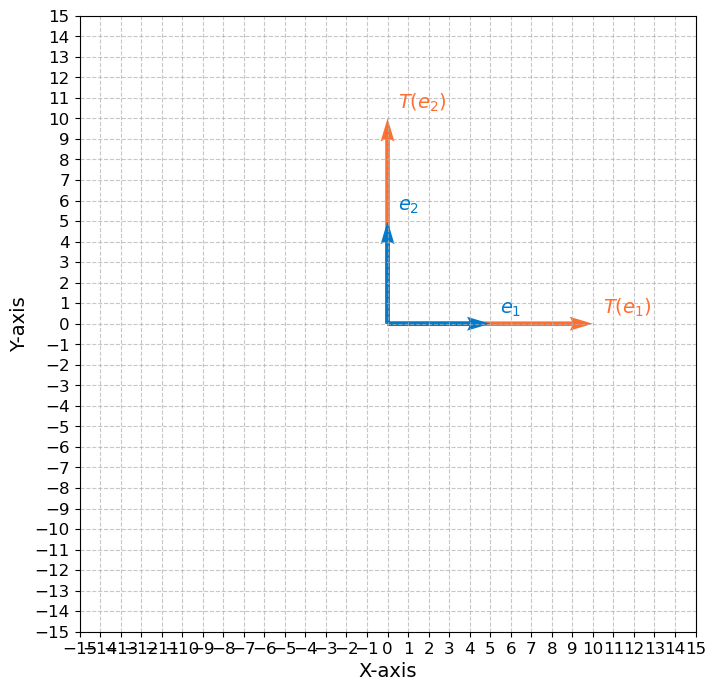

In [2]:
# Define the transformation (example: horizontal scaling)
T_scaling = lambda v: np.array([2 * v[0], 2 * v[1]])  # Scaling by a factor of 2 for both x and y

# Standard basis vectors
e1 = np.array([5, 0])  # e1 vector
e2 = np.array([0, 5])  # e2 vector

# Apply the transformation to both basis vectors
e1_transformed = T_scaling(e1)  # Transform e1
e2_transformed = T_scaling(e2)  # Transform e2

# Set colors for original and transformed vectors
color_original = "#007acc"  # Original color
color_transformed = "#ff6f30"  # Transformed color

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Set tick parameters and limits
ax.tick_params(axis="both", labelsize=12)
ax.set_xticks(np.arange(-15, 16, 1))
ax.set_yticks(np.arange(-15, 16, 1))
ax.grid(True, linestyle="--", alpha=0.7)
ax.set_xlim([-15, 15])  # Adjusted limit for x-axis to accommodate transformed e1
ax.set_ylim([-15, 15])  # Adjusted limit for y-axis to accommodate transformed e2

# Plot transformed basis vectors
ax.quiver(0, 0, e1_transformed[0], e1_transformed[1], color=color_transformed, angles="xy", scale_units="xy", scale=1, label="$T(e_1)$")
ax.quiver(0, 0, e2_transformed[0], e2_transformed[1], color=color_transformed, angles="xy", scale_units="xy", scale=1, label="$T(e_2)$")

# Annotate transformed basis vectors
ax.text(e1_transformed[0] + 0.5, e1_transformed[1] + 0.5, "$T(e_1)$", fontsize=14, color=color_transformed)
ax.text(e2_transformed[0] + 0.5, e2_transformed[1] + 0.5, "$T(e_2)$", fontsize=14, color=color_transformed)

# Plot original basis vectors
ax.quiver(0, 0, e1[0], e1[1], color=color_original, angles="xy", scale_units="xy", scale=1, label="$e_1$")
ax.quiver(0, 0, e2[0], e2[1], color=color_original, angles="xy", scale_units="xy", scale=1, label="$e_2$")

# Annotate original basis vectors
ax.text(e1[0] + 0.5, e1[1] + 0.5, "$e_1$", fontsize=14, color=color_original)
ax.text(e2[0] + 0.5, e2[1] + 0.5, "$e_2$", fontsize=14, color=color_original)

# Add labels
ax.set_xlabel("X-axis", fontsize=14)
ax.set_ylabel("Y-axis", fontsize=14)

# Show legend and plot
plt.gca().set_aspect("equal")
plt.show()

## Reflection

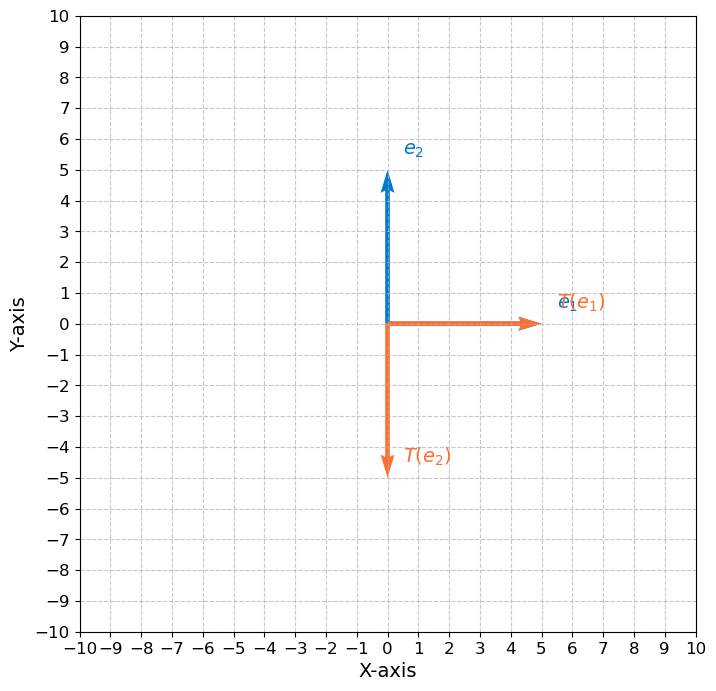

In [3]:
# Define the reflection transformation (across the x-axis)
T_reflection = lambda v: np.array([v[0], -v[1]])  # Reflecting v across the x-axis

# Standard basis vectors
e1 = np.array([5, 0])  # e1 vector
e2 = np.array([0, 5])  # e2 vector

# Apply the transformation to both basis vectors
e1_reflected = T_reflection(e1)  # Reflect e1
e2_reflected = T_reflection(e2)  # Reflect e2

# Set colors for original and reflected vectors
color_original = "#007acc"  # Original color
color_reflected = "#ff6f30"  # Reflected color

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Set tick parameters and limits
ax.tick_params(axis="both", labelsize=12)
ax.set_xticks(np.arange(-10, 11, 1))
ax.set_yticks(np.arange(-10, 11, 1))
ax.grid(True, linestyle="--", alpha=0.7)
ax.set_xlim([-10, 10])  # Adjusted limit for x-axis to accommodate reflected e1
ax.set_ylim([-10, 10])  # Adjusted limit for y-axis to accommodate reflected e2

# Plot original basis vectors
ax.quiver(0, 0, e1[0], e1[1], color=color_original, angles="xy", scale_units="xy", scale=1, label="$e_1$")
ax.quiver(0, 0, e2[0], e2[1], color=color_original, angles="xy", scale_units="xy", scale=1, label="$e_2$")

# Annotate original basis vectors
ax.text(e1[0] + 0.5, e1[1] + 0.5, "$e_1$", fontsize=14, color=color_original)
ax.text(e2[0] + 0.5, e2[1] + 0.5, "$e_2$", fontsize=14, color=color_original)

# Plot reflected basis vectors
ax.quiver(0, 0, e1_reflected[0], e1_reflected[1], color=color_reflected, angles="xy", scale_units="xy", scale=1, label="$T(e_1)$")
ax.quiver(0, 0, e2_reflected[0], e2_reflected[1], color=color_reflected, angles="xy", scale_units="xy", scale=1, label="$T(e_2)$")

# Annotate reflected basis vectors
ax.text(e1_reflected[0] + 0.5, e1_reflected[1] + 0.5, "$T(e_1)$", fontsize=14, color=color_reflected)
ax.text(e2_reflected[0] + 0.5, e2_reflected[1] + 0.5, "$T(e_2)$", fontsize=14, color=color_reflected)

# Add labels
ax.set_xlabel("X-axis", fontsize=14)
ax.set_ylabel("Y-axis", fontsize=14)

# Show legend and plot
plt.gca().set_aspect("equal")
plt.show()

# Real Examples

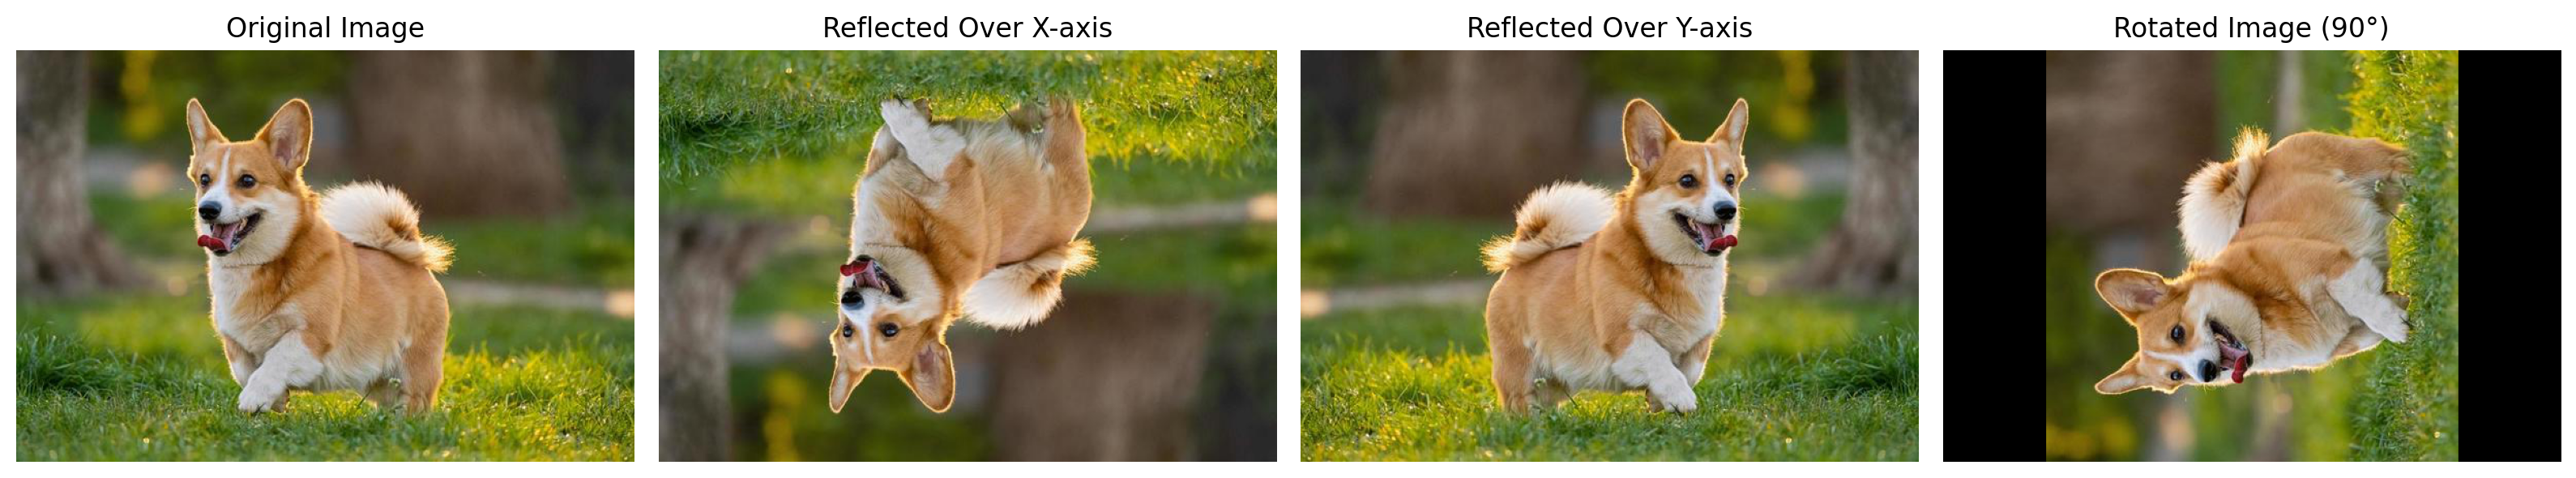

In [4]:
original_image = Image.open("../assets/dog.jpg")

reflected_x_image = original_image.transpose(method=Image.FLIP_TOP_BOTTOM)
reflected_y_image = original_image.transpose(method=Image.FLIP_LEFT_RIGHT)
rotated_image = original_image.rotate(90)

fig, axes = plt.subplots(1, 4, figsize=(16, 8), dpi=200)

axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(reflected_x_image)
axes[1].set_title("Reflected Over X-axis")
axes[1].axis("off")

axes[2].imshow(reflected_y_image)
axes[2].set_title("Reflected Over Y-axis")
axes[2].axis("off")

axes[3].imshow(rotated_image)
axes[3].set_title("Rotated Image (90°)")
axes[3].axis("off")

plt.tight_layout()
plt.show()